In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("Users/DELL/Downloads/HAR_Dataset-20230601T155736Z-001/HAR_Dataset/HAR_Dataset.csv")

FileNotFoundError: ignored

In [ ]:
df.head()

,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,Activity
0,301.66,69.29,25.04,27.44,336.80,18.15,263.22,106.08,Sitting
1,304.09,71.30,23.89,28.50,336.86,17.92,262.83,107.08,Sitting
2,304.58,72.47,23.31,28.07,337.20,16.98,262.18,110.21,Sitting
3,306.44,73.08,23.02,28.61,337.16,17.04,261.83,109.31,Sitting
4,306.76,73.18,23.40,28.23,337.44,16.65,260.69,109.79,Sitting


In [ ]:
df.head(100)

,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,Activity
0,301.66,69.29,25.04,27.44,336.80,18.15,263.22,106.08,Sitting
1,304.09,71.30,23.89,28.50,336.86,17.92,262.83,107.08,Sitting
2,304.58,72.47,23.31,28.07,337.20,16.98,262.18,110.21,Sitting
3,306.44,73.08,23.02,28.61,337.16,17.04,261.83,109.31,Sitting
4,306.76,73.18,23.40,28.23,337.44,16.65,260.69,109.79,Sitting
...,...,...,...,...,...,...,...,...,...
95,311.89,80.70,27.63,28.47,338.52,17.14,260.77,106.86,Sitting
96,311.89,80.94,27.63,28.94,338.52,17.03,260.77,106.86,Sitting
97,311.18,80.94,27.78,28.94,338.52,17.03,260.77,106.86,Sitting
98,311.18,80.22,27.78,29.46,338.52,17.03,260.77,106.86,Sitting


In [ ]:
df.shape

(3861, 9)

In [ ]:
df.isnull().sum()

left_elbow_angle        0
right_elbow_angle       0
left_shoulder_angle     0
right_shoulder_angle    0
left_hip_angle          0
right_hip_angle         0
left_knee_angle         0
right_knee_angle        0
Activity                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3861 entries, 0 to 3860
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   left_elbow_angle      3861 non-null   float64
 1   right_elbow_angle     3861 non-null   float64
 2   left_shoulder_angle   3861 non-null   float64
 3   right_shoulder_angle  3861 non-null   float64
 4   left_hip_angle        3861 non-null   float64
 5   right_hip_angle       3861 non-null   float64
 6   left_knee_angle       3861 non-null   float64
 7   right_knee_angle      3861 non-null   float64
 8   Activity              3861 non-null   object 
dtypes: float64(8), object(1)
memory usage: 271.6+ KB


In [ ]:
X = df.iloc[:, :-1].values
X

array([[301.66,  69.29,  25.04, ...,  18.15, 263.22, 106.08],
       [304.09,  71.3 ,  23.89, ...,  17.92, 262.83, 107.08],
       [304.58,  72.47,  23.31, ...,  16.98, 262.18, 110.21],
       ...,
       [199.99, 188.4 , 342.23, ...,  27.87, 149.01, 138.56],
       [198.99, 185.35, 346.3 , ...,  26.66, 151.02, 141.99],
       [196.48, 184.73, 348.56, ...,  26.37, 152.83, 142.08]])

In [ ]:
df['Activity'].replace(['Sitting', 'Standing', "Walking", "Waving", "Yoga", "Squats"],
                        [0, 1, 2, 3, 4, 5], inplace=True)

In [ ]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [ ]:
X_train = X_train / 360
X_test = X_test / 360

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(6, input_shape=(8,),activation='relu'),
    keras.layers.Dense(6, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=200)
model.save('har_model.h5')

Epoch 1/200
97/97 [==============================] - 1s 1ms/step - loss: 1.8603 - accuracy: 0.1603
Epoch 2/200
97/97 [==============================] - 0s 1ms/step - loss: 1.7139 - accuracy: 0.2426
Epoch 3/200
97/97 [==============================] - 0s 1ms/step - loss: 1.6334 - accuracy: 0.2698
Epoch 4/200
97/97 [==============================] - 0s 1ms/step - loss: 1.5500 - accuracy: 0.3747
Epoch 5/200
97/97 [==============================] - 0s 1ms/step - loss: 1.4600 - accuracy: 0.4919
Epoch 6/200
97/97 [==============================] - 0s 1ms/step - loss: 1.3703 - accuracy: 0.5492
Epoch 7/200
97/97 [==============================] - 0s 1ms/step - loss: 1.2845 - accuracy: 0.6205
Epoch 8/200
97/97 [==============================] - 0s 1ms/step - loss: 1.2068 - accuracy: 0.6389
Epoch 9/200
97/97 [==============================] - 0s 1ms/step - loss: 1.1377 - accuracy: 0.6755
Epoch 10/200
97/97 [==============================] - 0s 1ms/step - loss: 1.0754 - accuracy: 0.7150
Epoch 11/

97/97 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.8352
Epoch 84/200
97/97 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.8387
Epoch 85/200
97/97 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.8403
Epoch 86/200
97/97 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.8381
Epoch 87/200
97/97 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.8371
Epoch 88/200
97/97 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.8394
Epoch 89/200
97/97 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.8378
Epoch 90/200
97/97 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.8374
Epoch 91/200
97/97 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.8387
Epoch 92/200
97/97 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8403
Epoch 93/200


In [ ]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 1ms/step - loss: 0.3895 - accuracy: 0.8629


[0.38947153091430664, 0.8628719449043274]

In [ ]:
y_pred = model.predict(X_test)
y_pred[0]

25/25 [==============================] - 0s 969us/step


array([8.5066497e-01, 4.0850444e-03, 1.4121743e-02, 8.6262935e-09,
       9.9997413e-01, 3.6923230e-01], dtype=float32)

In [ ]:
print(X_test[0])

[0.72075    0.48791667 0.05952778 0.04041667 0.05644444 0.11658333
 0.51311111 0.06427778]


In [ ]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

[4, 4, 1, 4, 4]

In [ ]:
y_test[:5]

array([4, 4, 5, 4, 4], dtype=int64)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[104,   0,   0,   0,   0,   0],
       [  0, 168,   0,   4,   0,   0],
       [  0,  19,  93,   0,   0,  14],
       [  0,   5,   0, 162,   0,   3],
       [  0,   0,   0,   0,  78,   0],
       [  0,  45,  13,   3,   0,  62]])>

Text(95.72222222222221, 0.5, 'Truth')

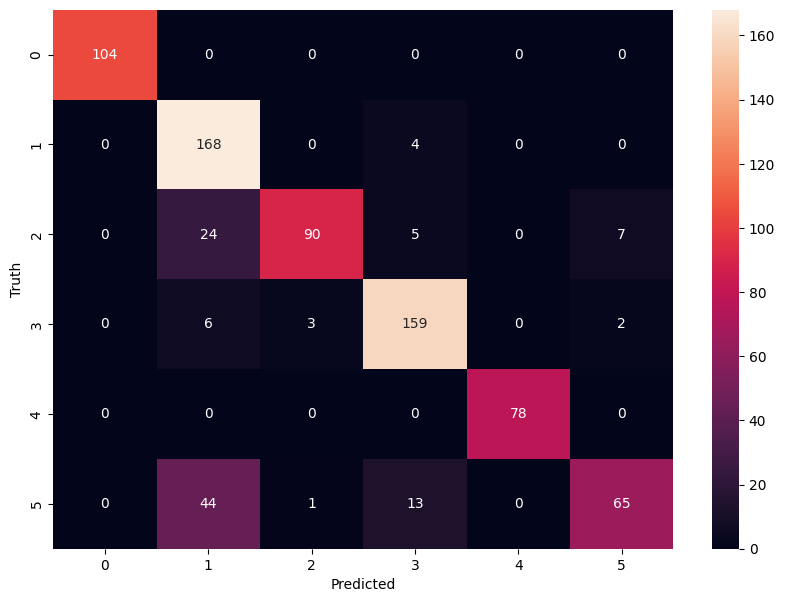

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')